# Uncertainty calculation using Monte Carlo Method

#### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Configuration of plotting

In [2]:
plt.rcParams["font.size"] = 12
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.left"] = False

In [51]:
def histogram_confidence_interval(name_data, data, confidence_interval, N, bins, color):
    alpha = 1 - confidence_interval
    n = int(round(1/2*alpha*N, 0)) # 2.5% of N
    data_mean = np.mean(data)
    data_std = np.std(data)
    data_sort =np.sort(data)
    data_lim_inf, data_lim_sup = data_sort[n], data_sort[N-n]
    plt.hist(data, bins = bins, color = color)
    plt.title(f"Distribution of ${name_data}$")
    plt.axvline(data_lim_inf, color = "red", linestyle = ":", linewidth = 2)
    plt.axvline(data_lim_sup, color = "red", linestyle = ":", linewidth = 2)
    plt.axvline(data_mean, color = "green", linestyle = "--", linewidth = 2)
    plt.xlabel(f"Posible values of ${name_data}$")
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.text(x =  -0.25, y = 0.25, s = f"Lower limit:\n{round(data_lim_inf, 4)} u", fontfamily = 'monospace',transform=plt.gca().transAxes)
    plt.text(x =  0.45, y = 0.25, s = f"Mean:\n{round(data_mean, 4)} u", fontfamily = 'monospace', backgroundcolor = color, transform=plt.gca().transAxes)
    plt.text(x =  1.0, y = 0.25, s = f"Upper limit:\n{round(data_lim_sup, 4)} u", fontfamily = 'monospace',transform=plt.gca().transAxes)
    plt.show()

#### Values for the simulation

In [4]:
N = 1_000_000 # Num of simulations
bins = 400 # For histrogram plot
np.random.seed(10) # For reproducibility of random values

#### Exploring of individual distributions 

##### Uncertainty of $x_1$

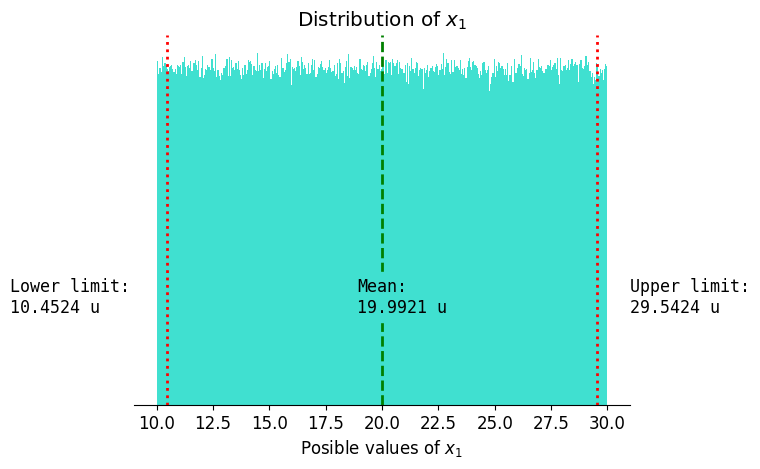

In [52]:
# Using a uniform distribution
a, b = 10.0, 30.0
x1 = np.random.uniform(a, b, N)
histogram_confidence_interval("x_1", x1, 0.9545, N, bins, 'turquoise')

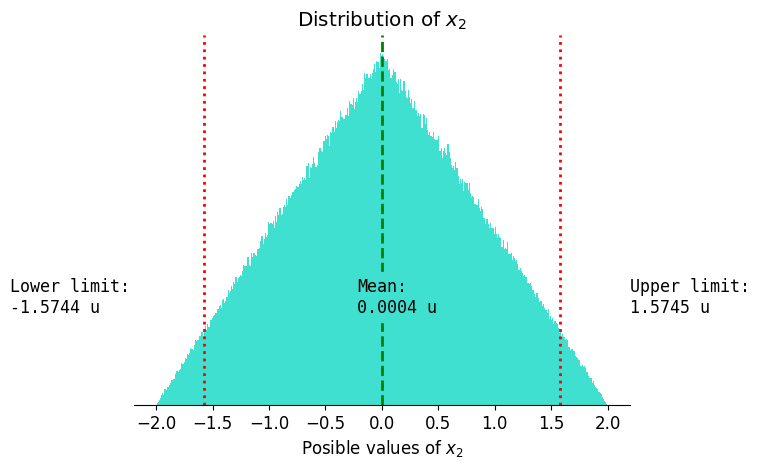

In [35]:
# Using a triangule distribution
a, m, b = -2, 0, 2
x2 = np.random.triangular(a, m, b, N)
histogram_confidence_interval("x_2", x2, 0.9545, N, bins, 'turquoise')

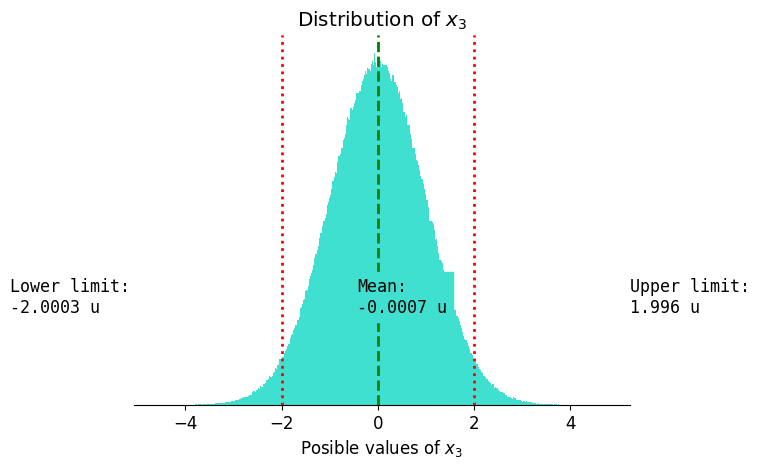

In [36]:
# Using a normal distribution
m, s = 0, 1
x3 = np.random.normal(m, s, N)
histogram_confidence_interval("x_3", x3, 0.9545, N, bins, 'turquoise')

### Uncertainty type A

For 10 measurements between -1 and 1

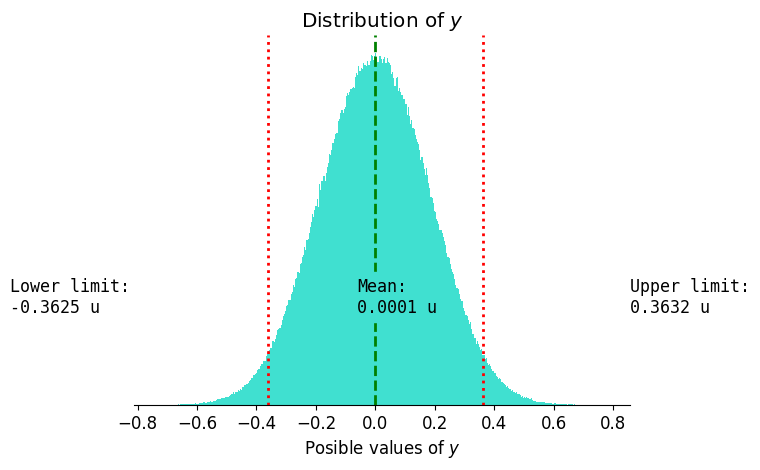

In [37]:
lectures = 10
a, b = -1, 1
x_sim = sum([np.random.uniform(a, b, N) for _ in range(lectures)])
y = x_sim/lectures
histogram_confidence_interval("y", y, 0.9545, N, bins, 'turquoise')

### Propagación de distribuciones

#### Model

$$ y = 5x_1 - 3x_2 + x_3$$

Suponiendo que $x_1$, $x_2$, $x_3$ son variables independientes

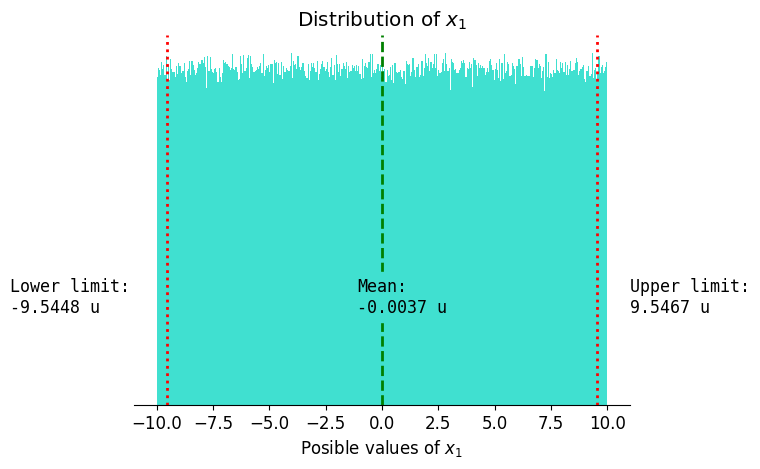

In [38]:
# Uniform distribution
a, b = 10, -10
x1 = np.random.uniform(a, b, N)
plt.hist(x1, bins = bins)
histogram_confidence_interval("x_1", x1, 0.9545, N, bins, 'turquoise')

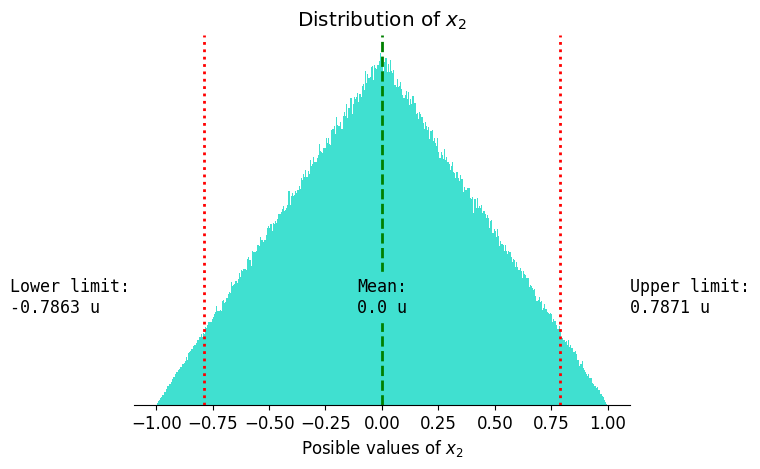

In [40]:
# Triangular distribution
a, m, b = -1, 0, 1
x2 = np.random.triangular(a, m, b, N)
histogram_confidence_interval("x_2", x2, 0.9545, N, bins, 'turquoise')

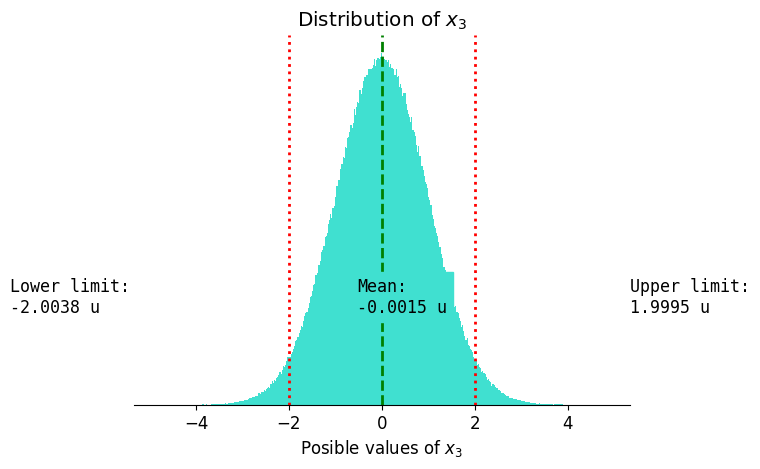

In [41]:
# Normal distribution
m, s = 0, 1
x3 = np.random.normal(m, s, N)
histogram_confidence_interval("x_3", x3, 0.9545, N, bins, 'turquoise')

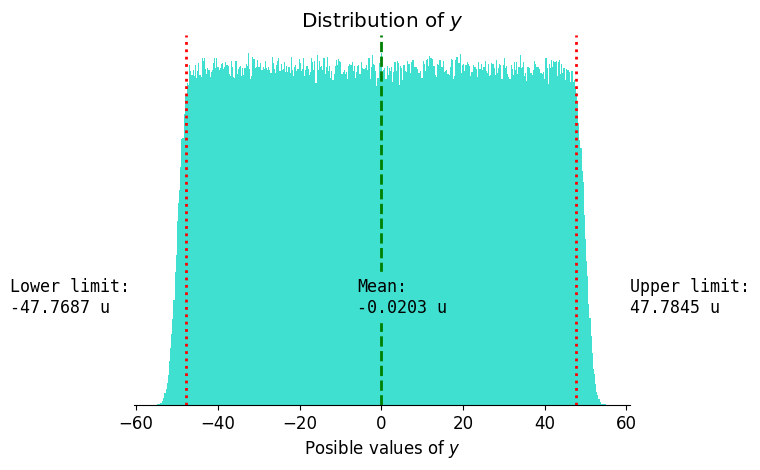

In [42]:
# Distribution of y
y = 5*x1 - 3*x2 + x3
histogram_confidence_interval("y", y, 0.9545, N, bins, 'turquoise')

### Ejemplo

Modelo 

$$E = (V_x + \delta V_{resolution}) - (V_{cal} + \delta V_{instrumental})$$

In [54]:
lectures = [40.000, 39.999, 39.998, 40.000, 39.999, 39.999]
n = len(lectures)
N = 10_000_000

Incertidumbre tipo A

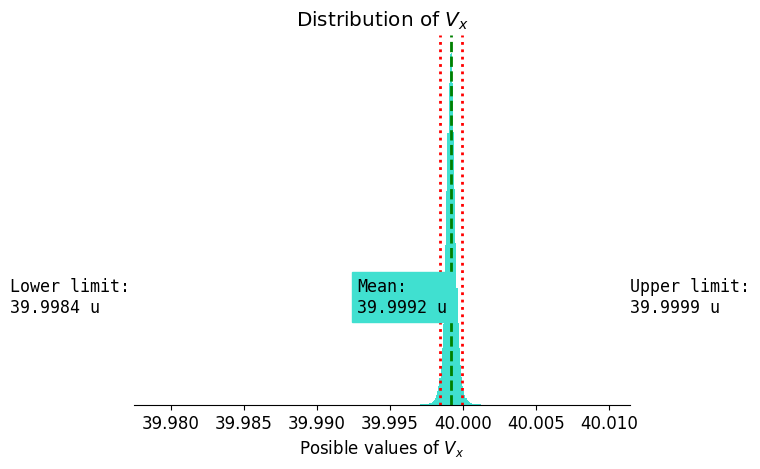

In [55]:
# t-Student distribution
df = n - 1 # Degrees of freedom
mean = np.mean(lectures)
std = np.std(lectures)/np.sqrt(n)
Vx = mean + std * np.random.standard_t(df = df, size = N)
histogram_confidence_interval("V_x", Vx, 0.9545, N, bins, 'turquoise')


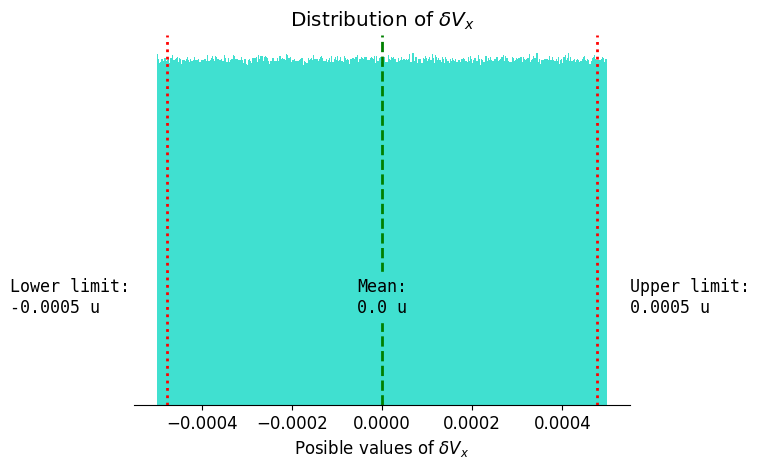

In [56]:
# Uniform distribution
resolution = 0.001
a, b = -resolution/2, resolution/2
dVx = np.random.uniform(a, b, N)
histogram_confidence_interval("\delta V_x", dVx, 0.9545, N, bins, 'turquoise')

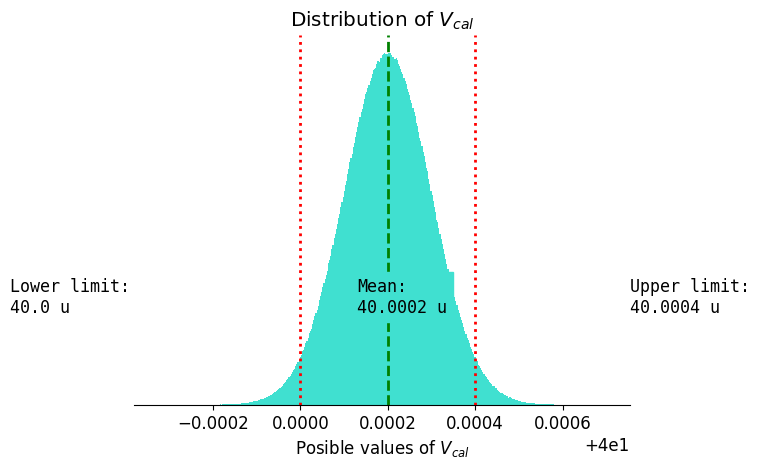

In [58]:
# Normal distribution
m = 40.0002
U_cal = 0.0002
U_factor = 2
s_cal = U_cal/U_factor
V_cal = np.random.normal(m, s_cal, N)
histogram_confidence_interval("V_{cal}", V_cal, 0.9545, N, bins, 'turquoise')

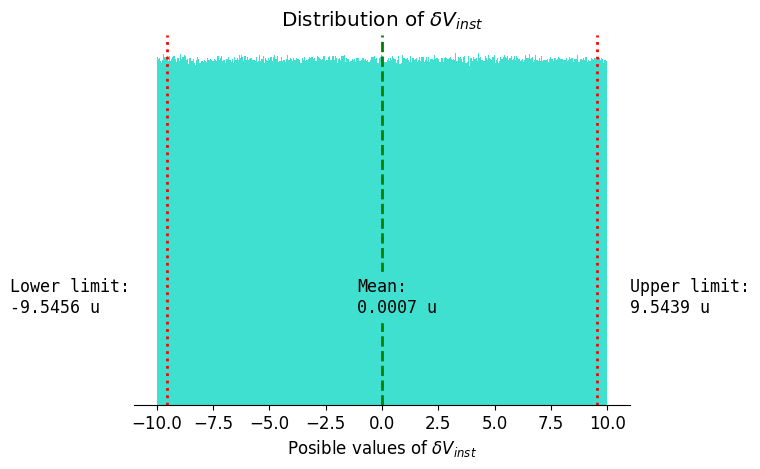

In [60]:
# Uniform distribution
a, b = 10, -10
dV_inst = np.random.uniform(a, b, N)
histogram_confidence_interval("\delta V_{inst}", dV_inst, 0.9545, N, bins, 'turquoise')

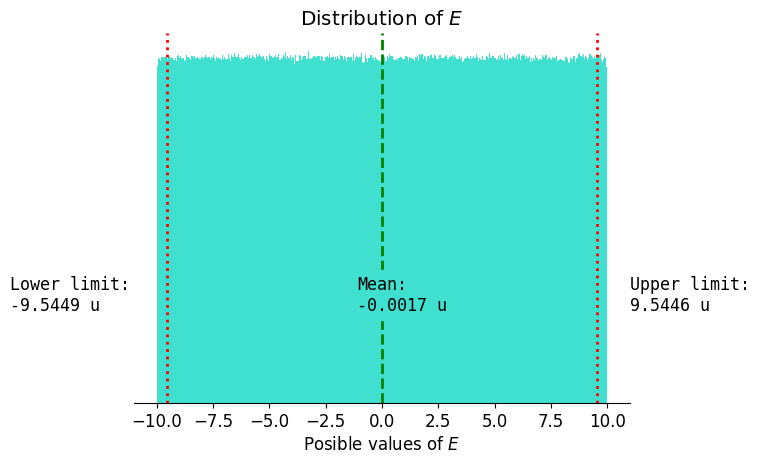

In [61]:
# Uncertainty of E
E = (Vx + dVx) - (V_cal + dV_inst)
histogram_confidence_interval("E", E, 0.9545, N, bins, 'turquoise')

## Boostraping

In [63]:
np.shape(E)

(10000000,)

In [64]:
tamano_muestra = 100_000
muestra_principal = np.random.choice(E, tamano_muestra)
np.shape(muestra_principal)

(100000,)

In [65]:
tamano_muestra = 100_000
num_muestras = 100
muestras = np.random.choice(E, size=(tamano_muestra, num_muestras), replace=True)

In [66]:
np.shape(muestras)

(100000, 100)

Calculo del intervalo de confianza utilizando cuantiles

In [67]:
# Cuantil 97.5 - Cuantil 2.5 = Intervalo de confianza del 95%
intervalo_confianza = np.quantile(muestras.mean(axis=1), [0.025, 0.975]) 
intervalo_confianza

array([-1.13002708,  1.13592623])

In [68]:
lim_inf, lim_sup = intervalo_confianza[0], intervalo_confianza[1]
media = E.mean()

Text(-0.2999034865308954, 1000, 'Mean:\n0.0001 u')

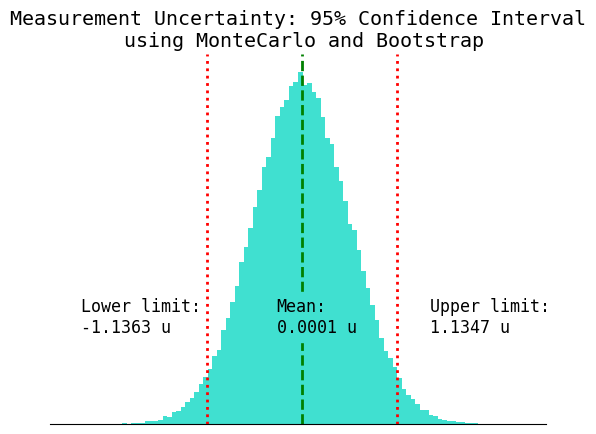

In [94]:
plt.hist(muestras.mean(axis = 1), bins = 100, color = 'turquoise')
plt.axvline(lim_inf, label = f"Lower limit: {np.round(lim_inf, 4)} u", color = "red", linestyle = ":", linewidth = 2)
plt.axvline(lim_sup, label = f"Upper limit: {np.round(lim_sup, 4)} u", color = "red", linestyle = ":", linewidth = 2)
plt.axvline(media, label = f"Mean: {np.round(media, 4)}", color = "green", linestyle = "--", linewidth = 2)
plt.title('Measurement Uncertainty: 95% Confidence Interval\n using MonteCarlo and Bootstrap', fontfamily = 'monospace')
plt.xlabel('\nCalificaciones promedio de las muestras')
plt.tick_params(axis='y', labelleft=False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.text(
    x = lim_inf - 1.5, 
    y = 1000,
    s = f"Lower limit:\n{round(lim_inf, 4)} u", 
    fontfamily = 'monospace'
)
plt.text(
    x = lim_sup + 0.4, 
    y = 1000,
    s = f"Upper limit:\n{round(lim_sup, 4)} u", 
    fontfamily = 'monospace'
)
plt.text(
    x = media - 0.3, 
    y = 1000,
    backgroundcolor = "turquoise",
    s = f"Mean:\n{round(media, 4)} u", 
    fontfamily = 'monospace'
)

In [69]:
histogram_confidence_interval("Uncertainty measurement", muestras, 0.9545, N, bins, 'turquoise')

IndexError: index 227500 is out of bounds for axis 0 with size 100000

### Magnitudes de entrada correlacionadas

Modelo 

$$y = f(x_1, x_2, x_3) = 5x_1 - 3x_2 + x_3$$
$$r(x_1, x_2) -0.5$$

Para realizar la simulación de dos distribuciones correlacionadas primero se simulan de manera independiente

In [43]:
N = 1_000_000

Value of x1: -0.00044045337279526774 
Typical uncertainty of x1: 0.9999108986085596


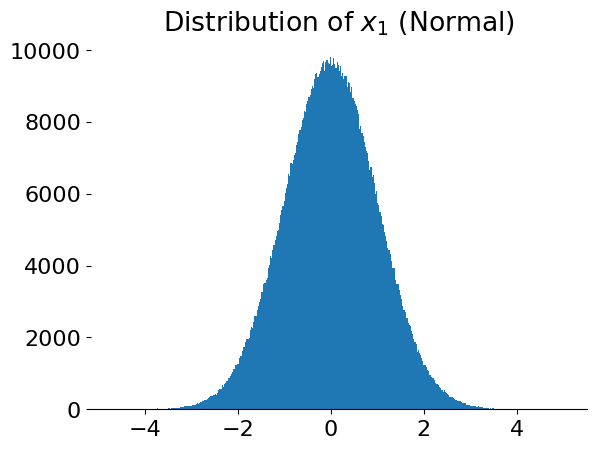

In [44]:
# Uncertainty of x1
mean = 0
std = 1
x1 = np.random.normal(mean, std, N)
plt.hist(x1, bins = bins)
plt.title("Distribution of $x_1$ (Normal)")
x1_prom, x1_std = np.mean(x1), np.std(x1)
print(f"Value of x1: {x1_prom} \nTypical uncertainty of x1: {x1_std}")

Value of x2: 0.0005325484402332732 
Typical uncertainty of x2: 0.9990238390987352


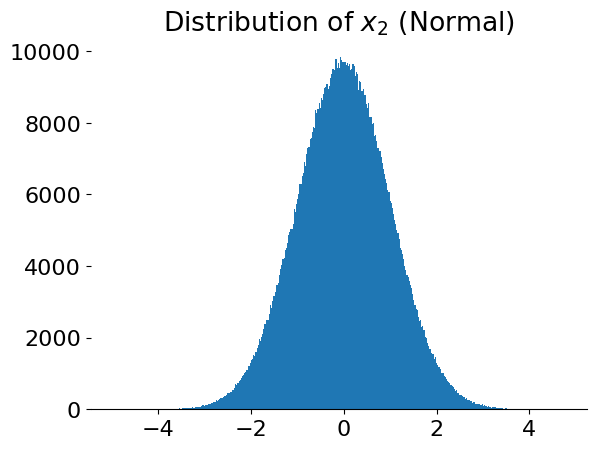

In [45]:
# Uncertainty of x2
mean = 0
std = 1
x2 = np.random.normal(mean, std, N)
plt.hist(x2, bins = bins)
plt.title("Distribution of $x_2$ (Normal)")
x2_prom, x2_std = np.mean(x2), np.std(x2)
print(f"Value of x2: {x2_prom} \nTypical uncertainty of x2: {x2_std}")

## Bootstrap